In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Xây dựng mô hình hồi quy tuyến tính**

Xử dụng tập dữ liệu giá nhà đất - HousePrice.csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tranlybuu/BaiTap/main/2022/HousePrice.csv')
df = df.drop(['date','street','city','statezip','country'],axis=1)
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


Mô tả dữ liệu

- price: Sale price of the house (Prediction target)

- bedrooms: Number of the bedrooms

- bathrooms: Number the bathrooms

- sqft_living: Square footage of the home

- sqft_lot: Square footage of the lot

- floors: Total floors (levels) in the house

- waterfront: House which has a view to a waterfront

- view: Number of views

- condition: How good the condition is overall

- sqft_above: Square footage of the house apart from basement

- sqft_basement: Square footage of the basement

- yr_built: Building year of the house

- yr_renovated: Renovation year of the house


In [3]:
print("Kích thước của tập dữ liệu:",df.shape)

Kích thước của tập dữ liệu: (4600, 13)


In [5]:
# Kiểm tra các giá trị và kiểu dữ liệu bị thiếu của mỗi cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 467.3 KB


In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Chia tập dữ liệu train và test

In [26]:
# Tách cột giá nhà
output = df['price']
input = df.drop(['price'],axis=1)
# input = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors']]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.3, random_state=0)

Huấn luyện mô hình với tập dữ liệu train

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Kiểm thử mô  hình với tập dữ liệu test

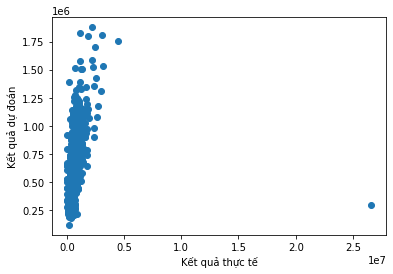

In [29]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Kết quả thực tế")
plt.ylabel("Kết quả dự đoán")
plt.show()

In [31]:
print("Accuracy:",model.score(X_test, y_test))

Accuracy: 0.08872263979998107
